NA18989_HIFIEC_hifiasm-v0.15.4_REF_ERR3239679.seq-qv.h5
5055835
7711
                               read_name  kmer_in_seq  kmer_in_db  \
296   m64119_210501_214725/120783140/ccs        38953     8378190   
1998  m64119_210501_214725/127992618/ccs        21654     8378190   
2266  m64119_210501_214725/159188838/ccs        33123     8378190   
3238   m64119_210501_214725/83167562/ccs        26601     8378190   
3534   m64119_210501_214725/14221907/ccs        19564     8378190   

      kmer_shared  error_rate  qv_estimate  
296             2    0.000002         57.8  
1998           81    0.000121         39.2  
2266            6    0.000006         52.3  
3238            1    0.000001         59.2  
3534            3    0.000005         53.1  
0.0001
NA18989_ONTUL_guppy-5.0.11-sup-prom_MAP-TO_HIFIEC.mbg-k1001-w500_REF_ERR3239679.seq-qv.h5
1518911
9826
                                             read_name  kmer_in_seq  \
37    b188c5d2-48eb-4fa7-8e23-d2b07543d868_0_86_191916       1929

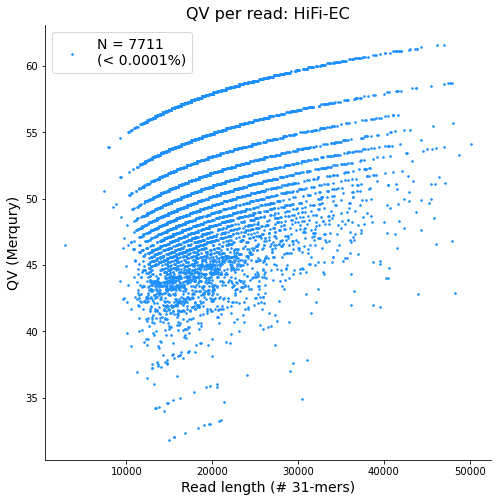

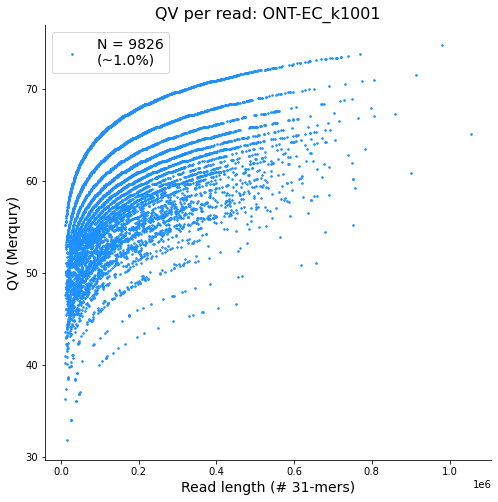

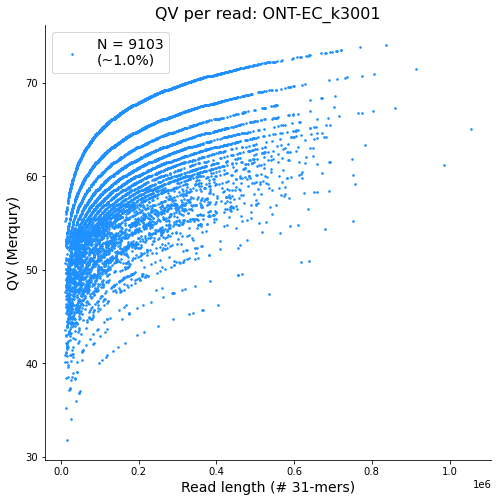

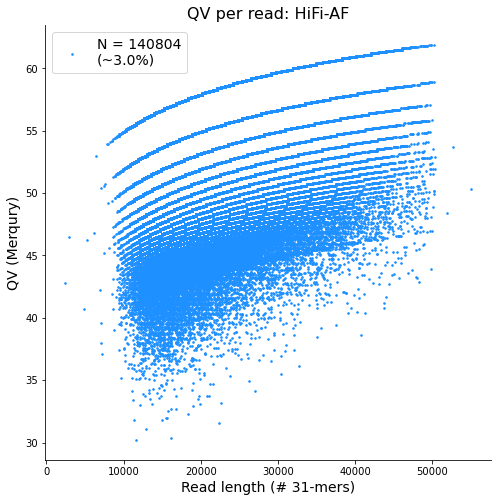

In [15]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pathlib as pl
import math

path = pl.Path('/home/local/work/data/hgsvc_2021/sig_ontqc/seq_qv')
hdf_files = path.glob('*seq-qv.h5')


def plot_qv_by_length(data, readset, out_name):
    
    num_perfect = (data['qv_estimate'] < 0).sum()
    num_imperfect = data.shape[0] - num_perfect
    print(num_perfect)
    print(num_imperfect)
    plot_data = data.loc[data['qv_estimate'] > 0, :].copy()
    print(plot_data.head())
    
    pct_imperfect = round(num_imperfect / data.shape[0] * 100, 0)
    print(1e-4)
    if math.isclose(pct_imperfect, 0, abs_tol=1e-4):
        legend_label = '(< 0.0001%)'
    else:
        legend_label = f'(~{pct_imperfect}%)'
    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(
        plot_data['kmer_in_seq'].values,
        plot_data['qv_estimate'].values,
        s=10,
        c='dodgerblue',
        marker='.',
        label=f'N = {num_imperfect}\n{legend_label}'
    )
    
    ax.set_title(f'QV per read: {readset}', fontsize=16)
    ax.legend(loc='best', fontsize=14)
    ax.set_xlabel('Read length (# 31-mers)', fontsize=14)
    ax.set_ylabel('QV (Merqury)', fontsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(out_name, dpi=300, bbox_inches='tight')
    return

def infer_readset(file_name):
    
    readset = file_name.split('_')[1]
    if readset == 'ONTUL':
        if 'mbg' in file_name:
            if 'k1001' in file_name:
                readset = 'ONT-EC_k1001'
            else:
                readset = 'ONT-EC_k3001'
        else:
            readset = 'ONT-UL'
    else:
        readset = f'HiFi-{readset[-2:]}'
    return readset
    
    

for hdf_file in hdf_files:
    with pd.HDFStore(hdf_file, 'r') as hdf:
        print(hdf_file.name)
        data = hdf['sequence_qv']
        readset = infer_readset(hdf_file.name)
        plot_qv_by_length(data, readset, hdf_file.with_suffix('.png'))
        